# Purpose of notebook
This notebook is to continue to explore the data, in particular the time-series and bi-modal distributions from previous version. 

Topics covered:
- data normalization by round
- data cleaning/flattening


In [1]:
import json
import pandas as pd

## Loading the data

In [2]:
# Load JSON data from file
with open('dev_data.json', 'r') as f:
    data = json.load(f)

# Access an element to retrieve the keys
sample_element = data[0]
columns = sample_element.keys()
print("Columns:", columns)

num_rows = len(data)
print("Number of rows:", num_rows)

Columns: dict_keys(['id', 'game_id', 'map_id', 'processed', 'process_date', 'created_at', 'updated_at', 'match_id', 'result', 'score', 'statistics', 'totals', 'ten_minute_averages', 'character_id', 'user_id', 'match_length', 'video_id', 'card_url', 'total_time', 'totals_to_date', 'start_time', 'end_time', 'start_frame', 'end_frame', 'status', 'report', 'analysis_processed', 'analysis_status'])
Number of rows: 534


In [3]:
# Observing a random entry
data[533]

{'id': 1461,
 'game_id': 3,
 'map_id': 134,
 'processed': True,
 'process_date': None,
 'created_at': '2023-02-27T21:05:53.784Z',
 'updated_at': '2023-03-01T16:36:13.672Z',
 'match_id': None,
 'result': 'win',
 'score': '13-7',
 'statistics': {'map': 'Lotus',
  'score': '13-7',
  'allies': ['0', '1', '2', '3', '4'],
  'player': '2',
  'result': 'win',
  'rounds': {'0': {'alive': {'0': [[194, True], [56987, False]],
     '1': [[194, True], [78984, False]],
     '2': [[194, True], [74584, False]],
     '3': [[194, True], [48388, False]],
     '4': [[194, True], [63186, False]],
     '5': [[194, True],
      [56587, False],
      [64386, True],
      [77384, False],
      [79384, True]],
     '6': [[194, True]],
     '7': [[194, True]],
     '8': [[194, True]],
     '9': [[194, True]]},
    'elims': [[48388,
      {'source': '7',
       'target': '3',
       'assisted': [],
       'headshot': False,
       'wallbang': False,
       'elim_number': 1,
       'first_blood': True,
       'tea

In [4]:
# Observing specifically the stats col
data[0]['statistics']

{'map': 'Pearl',
 'score': '13-3',
 'allies': ['0', '1', '2', '3', '4'],
 'player': '1',
 'result': 'win',
 'rounds': {'7': {'alive': {'0': [[0, True], [4800, False]],
    '1': [[0, True], [53800, False]],
    '2': [[0, True], [57000, False]],
    '3': [[0, True], [112400, False]],
    '4': [[0, True], [112400, False], [124400, True]],
    '5': [[0, True], [41600, False], [48600, True], [53800, False]],
    '6': [[0, True], [112400, False]],
    '7': [[0, True], [57600, False]],
    '8': [[0, True], [112400, False]],
    '9': [[0, True], [42400, False]]},
   'elims': [[42400,
     {'source': '4',
      'target': '9',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': True,
      'team_credit': 'ally'}],
    [54000,
     {'source': '6',
      'target': '1',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': False,
      'team_credit': 'opponent'}],
    [57600

In [5]:
# Observing specifically the stats col
data[533]['statistics']

{'map': 'Lotus',
 'score': '13-7',
 'allies': ['0', '1', '2', '3', '4'],
 'player': '2',
 'result': 'win',
 'rounds': {'0': {'alive': {'0': [[194, True], [56987, False]],
    '1': [[194, True], [78984, False]],
    '2': [[194, True], [74584, False]],
    '3': [[194, True], [48388, False]],
    '4': [[194, True], [63186, False]],
    '5': [[194, True],
     [56587, False],
     [64386, True],
     [77384, False],
     [79384, True]],
    '6': [[194, True]],
    '7': [[194, True]],
    '8': [[194, True]],
    '9': [[194, True]]},
   'elims': [[48388,
     {'source': '7',
      'target': '3',
      'assisted': [],
      'headshot': False,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': True,
      'team_credit': 'opponent'}],
    [57187,
     {'source': '8',
      'target': '0',
      'assisted': [],
      'headshot': True,
      'wallbang': False,
      'elim_number': 1,
      'first_blood': False,
      'team_credit': 'opponent'}],
    [63586,
     {'source': '6',


## Create Rounds DF
- Create DF
- Go to statistics col

In [6]:
from pandas import json_normalize

# Create df
df = pd.read_json('dev_data.json')
print(df.shape)

# Drop the all cols besides 'statistics' and 'user_id'
df_stats = df[['user_id','statistics']]
print(df_stats.shape)
df_stats

(534, 28)
(534, 2)


,user_id,statistics
0,1006,"{'map': 'Pearl', 'score': '13-3', 'allies': ['..."
1,1006,"{'map': 'Haven', 'score': '9-13', 'allies': ['..."
2,1006,"{'map': 'Split', 'score': '13-4', 'allies': ['..."
3,1011,"{'map': 'Fracture', 'score': '14-12', 'allies'..."
4,1011,"{'map': 'Haven', 'score': '13-10', 'allies': [..."
...,...,...
529,1010,"{'map': 'Ascent', 'score': '13-8', 'allies': [..."
530,1011,"{'map': 'Bind', 'score': '14-12', 'allies': ['..."
531,1011,"{'map': 'unknown', 'score': '13-11', 'allies':..."
532,1018,"{'map': 'Split', 'score': '13-4', 'allies': ['..."


### Flattening the stats col by 1 level

In [7]:
flat1_df_stats = pd.json_normalize(df_stats['statistics'], max_level=0)
flat1_df_stats = pd.concat([df_stats['user_id'], flat1_df_stats], axis=1)
print(flat1_df_stats.shape)
flat1_df_stats

(534, 34)


,user_id,map,score,allies,player,result,rounds,status,totals,version,...,best_weapon_type,best_weapon_elims,detections_totals,most_used_primary,analysis_processed,opponents_onscreen,most_used_secondary,best_weapon_type_elims,most_used_primary_seconds,most_used_secondary_seconds
0,1006,Pearl,13-3,"[0, 1, 2, 3, 4]",1,win,"{'7': {'alive': {'0': [[0, True], [4800, False...",success: completed - valorant final,"{'elims': 9, 'deaths': 3, 'assists': 2, 'heali...",1.0.0,...,primary,4,"{'7': {'final_time': 19850, 'initial_size': {'...",vandal,True,"{'5250': 0, '19600': 1, '22150': 0, '28700': 1...",sheriff,5,309,109
1,1006,Haven,9-13,"[0, 1, 2, 3, 4]",4,loss,"{'0': {'alive': {'0': [[95000, True], [140000,...",success: completed - valorant final,"{'elims': 21, 'deaths': 17, 'assists': 0, 'hea...",1.0.0,...,primary,9,"{'26': {'final_time': 46900, 'initial_size': {...",vandal,True,"{'14200': 0, '46450': 1, '50800': 0, '60100': ...",ghost,14,298,94
2,1006,Split,13-4,"[0, 1, 2, 3, 4]",3,win,"{'0': {'alive': {'0': [[3600, True], [50600, F...",success: completed - valorant final,"{'elims': 32, 'deaths': 8, 'assists': 3, 'heal...",1.0.0,...,primary,4,"{'55': {'final_time': 78100, 'initial_size': {...",vandal,True,"{'1600': 0, '77900': 1, '78000': 0, '78100': 1...",sheriff,12,192,195
3,1011,Fracture,14-12,"[0, 1, 2, 3, 4]",0,win,"{'0': {'alive': {'0': [[110199, True], [175399...",success: completed - valorant final,"{'elims': 14, 'deaths': 12, 'assists': 12, 'he...",1.0.0,...,primary,6,"{'51': {'final_time': 117249, 'initial_size': ...",vandal,True,"{'33799': 0, '116999': 1, '117299': 0, '125449...",frenzy,10,1455,137
4,1011,Haven,13-10,"[0, 1, 2, 3, 4]",2,win,"{'0': {'alive': {'0': [[73399, True], [153799,...",success: completed - valorant final,"{'elims': 15, 'deaths': 16, 'assists': 6, 'hea...",1.0.0,...,primary,8,"{'33': {'final_time': 91399, 'initial_size': {...",vandal,True,"{'6199': 0, '91199': 1, '92299': 0, '92349': 1...",frenzy,9,1131,291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1010,Ascent,13-8,"[0, 1, 2, 3, 4]",0,win,"{'0': {'alive': {'0': [[49789, True], [71389, ...",success: completed - valorant postprocess,"{'elims': 12, 'deaths': 11, 'assists': 9, 'hea...",NaN,...,primary,4,NaN,vandal,NaN,NaN,ghost,7,507,157
530,1011,Bind,14-12,"[0, 1, 2, 3, 4]",0,win,"{'0': {'alive': {'0': [[44988, True], [88188, ...",success: completed - valorant postprocess,"{'elims': 24, 'deaths': 19, 'assists': 8, 'hea...",NaN,...,primary,8,NaN,phantom,NaN,NaN,frenzy,12,1268,105
531,1011,unknown,13-11,"[0, 1, 2, 3, 4]",0,win,"{'0': {'alive': {'0': [[9, True], [113209, Fal...",success: completed - valorant postprocess,"{'elims': 23, 'deaths': 16, 'assists': 6, 'hea...",NaN,...,primary,8,NaN,vandal,NaN,NaN,ghost,12,664,139
532,1018,Split,13-4,"[0, 1, 2, 3, 4]",3,win,"{'0': {'alive': {'0': [[199, True], [168177, F...",success: completed - valorant postprocess,"{'elims': 11, 'deaths': 14, 'assists': 6, 'hea...",NaN,...,primary,3,NaN,phantom,NaN,NaN,sheriff,6,294,39


### Removing some cols we don't care about from the ROUND perspective
- Just to see how it would work I am keeping map (this is from the match perspective) 

In [8]:
# Keep in mind the 'totals', 'result' are from the MATCH perspective
# I don't really know what to do with 'detections_totals' so I am dropping it for now
# The best weapon/most used/player_totals (weapon) is again from a match perspective
# I think 'allies_onscreen' and 'opponents_onscreen' could be useful but it is from match perspective

# Just to see how it would work I am keeping map (this is from the match perspective) 

flat1_df_stats = flat1_df_stats.drop(['totals','score', 'allies','result', 'status','version','end_time','opponents','processed','ally_score','start_time','opponent_score','detections_totals','best_weapon_type','best_weapon_elims','most_used_primary_seconds','analysis_processed','most_used_secondary_seconds','best_weapon_type_elims','opponents_onscreen','allies_onscreen','analysis_status','best_weapon','player_totals','most_used_primary','most_used_secondary'], axis=1)
flat1_df_stats['gametype'] = flat1_df_stats['gametype'].fillna('unknown')
print(flat1_df_stats.shape)
flat1_df_stats

(534, 8)


,user_id,map,player,rounds,gametype,player_ids,round_info,round_totals
0,1006,Pearl,1,"{'7': {'alive': {'0': [[0, True], [4800, False...",swiftplay,"{'0': {'role': 'ally', 'character': 'phoenix'}...","{'7': {'score': '4-3', 'ult_used': False, 'all...","{'7': {'elims': 0, 'deaths': 1, 'assists': 0, ..."
1,1006,Haven,4,"{'0': {'alive': {'0': [[95000, True], [140000,...",swiftplay,"{'0': {'role': 'ally', 'character': 'kay/o'}, ...","{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ..."
2,1006,Split,3,"{'0': {'alive': {'0': [[3600, True], [50600, F...",swiftplay,"{'0': {'role': 'ally', 'character': 'skye'}, '...","{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 1, 'deaths': 0, 'assists': 0, ..."
3,1011,Fracture,0,"{'0': {'alive': {'0': [[110199, True], [175399...",swiftplay,"{'0': {'role': 'self', 'character': 'breach'},...","{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ..."
4,1011,Haven,2,"{'0': {'alive': {'0': [[73399, True], [153799,...",swiftplay,"{'0': {'role': 'ally', 'character': 'omen'}, '...","{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ..."
...,...,...,...,...,...,...,...,...
529,1010,Ascent,0,"{'0': {'alive': {'0': [[49789, True], [71389, ...",unknown,"{'0': {'role': 'self', 'character': 'astra'}, ...","{'0': {'score': '0-0', 'ally_side': 'attacker'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ..."
530,1011,Bind,0,"{'0': {'alive': {'0': [[44988, True], [88188, ...",unknown,"{'0': {'role': 'self', 'character': 'viper'}, ...","{'0': {'score': '0-0', 'ally_side': 'defender'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ..."
531,1011,unknown,0,"{'0': {'alive': {'0': [[9, True], [113209, Fal...",unknown,"{'0': {'role': 'self', 'character': 'viper'}, ...","{'0': {'score': '0-0', 'ally_side': 'unknown',...","{'0': {'elims': 1, 'deaths': 1, 'assists': 0, ..."
532,1018,Split,3,"{'0': {'alive': {'0': [[199, True], [168177, F...",unknown,"{'0': {'role': 'ally', 'character': 'yoru'}, '...","{'0': {'score': '0-0', 'ally_side': 'defender'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ..."


In [9]:
flat1_df_stats['player_ids'][0]

{'0': {'role': 'ally', 'character': 'phoenix'},
 '1': {'role': 'self', 'character': 'jett'},
 '2': {'role': 'ally', 'character': 'gekko'},
 '3': {'role': 'ally', 'character': 'cypher'},
 '4': {'role': 'ally', 'character': 'astra'},
 '5': {'role': 'opponent', 'character': 'harbor'},
 '6': {'role': 'opponent', 'character': 'astra'},
 '7': {'role': 'opponent', 'character': 'jett'},
 '8': {'role': 'opponent', 'character': 'phoenix'},
 '9': {'role': 'opponent', 'character': 'killjoy'}}

### Flattening the player_ids col by 1 level
- To keep it simple I am just going to grab the active player (for now)

In [10]:
# Create an empty list to hold the expanded player ids
expanded_player_ids_list = []

for i, player_ids in enumerate(flat1_df_stats['player_ids']):
    mapping = {}
    for player_id, player_info in player_ids.items():
        role = player_info['role']
        if role == 'self':
            column_name = f"{role}_character"
            mapping[column_name] = player_info['character']
    
    # If mapping is not empty
    if mapping:
        expanded_player_ids_list.append(mapping)

# Create the expanded_player_ids DataFrame
expanded_player_ids = pd.DataFrame(expanded_player_ids_list)

expanded_player_ids

# Concatenate the original DataFrame with the expanded columns
flat2_df_stats_chars = pd.concat([flat1_df_stats.drop('player_ids', axis=1), expanded_player_ids], axis=1)

print(flat2_df_stats_chars.shape)
flat2_df_stats_chars

(534, 8)


,user_id,map,player,rounds,gametype,round_info,round_totals,self_character
0,1006,Pearl,1,"{'7': {'alive': {'0': [[0, True], [4800, False...",swiftplay,"{'7': {'score': '4-3', 'ult_used': False, 'all...","{'7': {'elims': 0, 'deaths': 1, 'assists': 0, ...",jett
1,1006,Haven,4,"{'0': {'alive': {'0': [[95000, True], [140000,...",swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...",gekko
2,1006,Split,3,"{'0': {'alive': {'0': [[3600, True], [50600, F...",swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 1, 'deaths': 0, 'assists': 0, ...",jett
3,1011,Fracture,0,"{'0': {'alive': {'0': [[110199, True], [175399...",swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...",breach
4,1011,Haven,2,"{'0': {'alive': {'0': [[73399, True], [153799,...",swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...",fade
...,...,...,...,...,...,...,...,...
529,1010,Ascent,0,"{'0': {'alive': {'0': [[49789, True], [71389, ...",unknown,"{'0': {'score': '0-0', 'ally_side': 'attacker'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...",astra
530,1011,Bind,0,"{'0': {'alive': {'0': [[44988, True], [88188, ...",unknown,"{'0': {'score': '0-0', 'ally_side': 'defender'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...",viper
531,1011,unknown,0,"{'0': {'alive': {'0': [[9, True], [113209, Fal...",unknown,"{'0': {'score': '0-0', 'ally_side': 'unknown',...","{'0': {'elims': 1, 'deaths': 1, 'assists': 0, ...",viper
532,1018,Split,3,"{'0': {'alive': {'0': [[199, True], [168177, F...",unknown,"{'0': {'score': '0-0', 'ally_side': 'defender'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...",brimstone


In [11]:
####### Getting all the characters ##########
# # Create an empty dataframe to hold the expanded columns
# expanded_player_ids = pd.DataFrame()

# for i, player_ids in enumerate(normalized_df_stats['player_ids']):
#     mapping = {}
#     for player_id, player_info in player_ids.items():
#         # If the role is 'self', map it to 'ally'
#         role = 'ally' if player_info['role'] == 'self' else player_info['role']
#         column_name = f"{role}{player_id}_character"
#         mapping[column_name] = player_info['character']
    
#     expanded_player_ids = expanded_player_ids.append(pd.Series(mapping), ignore_index=True)

# expanded_player_ids.index = normalized_df_stats.index

# # Drop the original 'player_ids' column and concatenate the original dataframe with the expanded columns
# normalized_df_chars = pd.concat([normalized_df_stats.drop('player_ids', axis=1), expanded_player_ids], axis=1)

# print(normalized_df_chars.shape)
# normalized_df_chars

### Flattening the round_info/round_totals cols by 1 level
- To keep it simple I am going to drop the more detailed rounds (for now)
- Have to parse the round info/round totals at the same time
- This is where the DF expands into rounds being the rows instead of matches being the rows

In [12]:
flat2_df_stats_chars = flat2_df_stats_chars.drop(['rounds'], axis=1)
flat2_df_stats_chars

,user_id,map,player,gametype,round_info,round_totals,self_character
0,1006,Pearl,1,swiftplay,"{'7': {'score': '4-3', 'ult_used': False, 'all...","{'7': {'elims': 0, 'deaths': 1, 'assists': 0, ...",jett
1,1006,Haven,4,swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...",gekko
2,1006,Split,3,swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 1, 'deaths': 0, 'assists': 0, ...",jett
3,1011,Fracture,0,swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...",breach
4,1011,Haven,2,swiftplay,"{'0': {'score': '0-0', 'ult_used': False, 'all...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...",fade
...,...,...,...,...,...,...,...
529,1010,Ascent,0,unknown,"{'0': {'score': '0-0', 'ally_side': 'attacker'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...",astra
530,1011,Bind,0,unknown,"{'0': {'score': '0-0', 'ally_side': 'defender'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 1, ...",viper
531,1011,unknown,0,unknown,"{'0': {'score': '0-0', 'ally_side': 'unknown',...","{'0': {'elims': 1, 'deaths': 1, 'assists': 0, ...",viper
532,1018,Split,3,unknown,"{'0': {'score': '0-0', 'ally_side': 'defender'...","{'0': {'elims': 0, 'deaths': 1, 'assists': 0, ...",brimstone


In [13]:
normalized_df_round_info = pd.DataFrame()
normalized_df_round_totals = pd.DataFrame()
df_round_info_list = []
df_round_totals_list = []

for i, row in flat2_df_stats_chars.iterrows():
    normalized_df_round_info = row['round_info']
    normalized_df_round_totals = row['round_totals']
    active_player = row['player']
    user_id = row['user_id']
    game_map = row['map']
    self_character = row['self_character']
    
    # starting with the round info
    for round_num in normalized_df_round_info.keys():
        round_info_dict = normalized_df_round_info[round_num]
        round_info_dict['user_id'] = user_id
        round_info_dict['map'] = game_map
        round_info_dict['self_character'] = self_character
        df_round_info_list.append(round_info_dict)
   
    # then the round totals
    for round_num in normalized_df_round_totals.keys(): 
        round_totals_dict = normalized_df_round_totals[round_num]
        round_totals_dict['user_id'] = user_id
        round_totals_dict['map'] = game_map
        round_totals_dict['self_character'] = self_character
        df_round_totals_list.append(round_totals_dict)

# Create the dataframes outside the loop
round_info_df = pd.DataFrame(df_round_info_list)
round_totals_df = pd.DataFrame(df_round_totals_list)


In [14]:
round_info_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,opponent_score,user_id,map,self_character
0,4-3,False,attacker,-25276,124802,True,4,4723,117802,False,3,1006,Pearl,jett
1,5-3,False,attacker,124802,204402,True,5,154802,197402,False,3,1006,Pearl,jett
2,6-3,False,attacker,204402,304570,True,6,234402,297570,True,3,1006,Pearl,jett
3,7-3,False,attacker,304570,369242,True,7,334570,362242,False,3,1006,Pearl,jett
4,8-3,False,attacker,369242,448998,True,8,399242,441998,False,3,1006,Pearl,jett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,NaN,attacker,1283681,1375064,True,8,1313681,1368064,NaN,7,1018,Lotus,sage
8042,9-7,NaN,attacker,1375064,1439659,True,9,1405064,1432659,NaN,7,1018,Lotus,sage
8043,10-7,NaN,attacker,1439659,1504595,True,10,1469659,1497595,NaN,7,1018,Lotus,sage
8044,11-7,NaN,attacker,1504595,1600300,True,11,1534595,1593300,NaN,7,1018,Lotus,sage


### Data cleaning
- I noticed some NaNs. This happens when there is missing information
- After investigating it seems like the ult_used and the spike_planted wasn't always captured
- round_totals_df is good though
- 1220 rows total which is sort of a lot (%15 of data)
- seems like 'uknown' is common so ill do that

In [15]:
round_info_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,opponent_score,user_id,map,self_character
0,4-3,False,attacker,-25276,124802,True,4,4723,117802,False,3,1006,Pearl,jett
1,5-3,False,attacker,124802,204402,True,5,154802,197402,False,3,1006,Pearl,jett
2,6-3,False,attacker,204402,304570,True,6,234402,297570,True,3,1006,Pearl,jett
3,7-3,False,attacker,304570,369242,True,7,334570,362242,False,3,1006,Pearl,jett
4,8-3,False,attacker,369242,448998,True,8,399242,441998,False,3,1006,Pearl,jett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,NaN,attacker,1283681,1375064,True,8,1313681,1368064,NaN,7,1018,Lotus,sage
8042,9-7,NaN,attacker,1375064,1439659,True,9,1405064,1432659,NaN,7,1018,Lotus,sage
8043,10-7,NaN,attacker,1439659,1504595,True,10,1469659,1497595,NaN,7,1018,Lotus,sage
8044,11-7,NaN,attacker,1504595,1600300,True,11,1534595,1593300,NaN,7,1018,Lotus,sage


In [16]:
# Find rows with NaN values
nan_rows = round_info_df[round_info_df.isnull().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

     score ult_used ally_side  buy_start  round_end round_won  ally_score  \
570    2-4    False   unknown     205197     432400       NaN           2   
6827   1-0      NaN  defender          0      54861      True           1   
6828   2-0      NaN  defender      54861     212909      True           2   
6829   3-0      NaN  defender     212909     317051      True           3   
6830   4-0      NaN  defender     317051     430258      True           4   
...    ...      ...       ...        ...        ...       ...         ...   
8041   8-7      NaN  attacker    1283681    1375064      True           8   
8042   9-7      NaN  attacker    1375064    1439659      True           9   
8043  10-7      NaN  attacker    1439659    1504595      True          10   
8044  11-7      NaN  attacker    1504595    1600300      True          11   
8045  12-7      NaN  attacker    1600300    1669369      True          12   

      round_start  round_scored spike_planted  opponent_score  user_id  \
5

In [17]:
round_totals_df

,elims,deaths,assists,healing,headshots,shielding,wallbangs,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,user_id,map,self_character
0,0,1,0,0,0,24,0,0,71,0,4760,0,53,9860,100,24,1006,Pearl,jett
1,2,0,0,0,2,50,0,0,0,1,4750,0,79,3300,0,0,1006,Pearl,jett
2,2,0,1,0,2,0,0,1,0,0,200,0,100,3900,0,0,1006,Pearl,jett
3,3,0,0,0,2,0,0,1,0,2,350,0,64,1650,23,46,1006,Pearl,jett
4,1,0,0,23,0,46,0,0,0,0,8550,0,79,3300,23,0,1006,Pearl,jett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,0,1,1,0,0,97,0,0,11,0,1050,0,79,300,100,97,1018,Lotus,sage
8042,0,0,0,0,0,92,0,0,0,0,4700,0,64,3000,0,42,1018,Lotus,sage
8043,2,0,1,21,2,42,1,1,0,2,0,0,64,2900,21,85,1018,Lotus,sage
8044,1,1,1,0,1,43,0,0,15,0,5800,0,79,7700,100,50,1018,Lotus,sage


In [18]:
# Find rows with NaN values
nan_rows = round_totals_df[round_totals_df.isnull().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

Empty DataFrame
Columns: [elims, deaths, assists, healing, headshots, shielding, wallbangs, first_bloods, seconds_dead, was_assisted, credits_spent, first_blooded, seconds_alive, credits_earned, hp_damage_taken, shield_damage_taken, user_id, map, self_character]
Index: []


In [19]:
# Merge the dataframes
round_totals_normalized_df = pd.merge(round_info_df, round_totals_df, left_index=True, right_index=True)
round_totals_normalized_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,user_id_y,map_y,self_character_y
0,4-3,False,attacker,-25276,124802,True,4,4723,117802,False,...,0,4760,0,53,9860,100,24,1006,Pearl,jett
1,5-3,False,attacker,124802,204402,True,5,154802,197402,False,...,1,4750,0,79,3300,0,0,1006,Pearl,jett
2,6-3,False,attacker,204402,304570,True,6,234402,297570,True,...,0,200,0,100,3900,0,0,1006,Pearl,jett
3,7-3,False,attacker,304570,369242,True,7,334570,362242,False,...,2,350,0,64,1650,23,46,1006,Pearl,jett
4,8-3,False,attacker,369242,448998,True,8,399242,441998,False,...,0,8550,0,79,3300,23,0,1006,Pearl,jett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,NaN,attacker,1283681,1375064,True,8,1313681,1368064,NaN,...,0,1050,0,79,300,100,97,1018,Lotus,sage
8042,9-7,NaN,attacker,1375064,1439659,True,9,1405064,1432659,NaN,...,0,4700,0,64,3000,0,42,1018,Lotus,sage
8043,10-7,NaN,attacker,1439659,1504595,True,10,1469659,1497595,NaN,...,2,0,0,64,2900,21,85,1018,Lotus,sage
8044,11-7,NaN,attacker,1504595,1600300,True,11,1534595,1593300,NaN,...,0,5800,0,79,7700,100,50,1018,Lotus,sage


In [20]:
round_totals_normalized_df = round_totals_normalized_df.fillna('unknown')
round_totals_normalized_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,user_id_y,map_y,self_character_y
0,4-3,False,attacker,-25276,124802,True,4,4723,117802,False,...,0,4760,0,53,9860,100,24,1006,Pearl,jett
1,5-3,False,attacker,124802,204402,True,5,154802,197402,False,...,1,4750,0,79,3300,0,0,1006,Pearl,jett
2,6-3,False,attacker,204402,304570,True,6,234402,297570,True,...,0,200,0,100,3900,0,0,1006,Pearl,jett
3,7-3,False,attacker,304570,369242,True,7,334570,362242,False,...,2,350,0,64,1650,23,46,1006,Pearl,jett
4,8-3,False,attacker,369242,448998,True,8,399242,441998,False,...,0,8550,0,79,3300,23,0,1006,Pearl,jett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,unknown,attacker,1283681,1375064,True,8,1313681,1368064,unknown,...,0,1050,0,79,300,100,97,1018,Lotus,sage
8042,9-7,unknown,attacker,1375064,1439659,True,9,1405064,1432659,unknown,...,0,4700,0,64,3000,0,42,1018,Lotus,sage
8043,10-7,unknown,attacker,1439659,1504595,True,10,1469659,1497595,unknown,...,2,0,0,64,2900,21,85,1018,Lotus,sage
8044,11-7,unknown,attacker,1504595,1600300,True,11,1534595,1593300,unknown,...,0,5800,0,79,7700,100,50,1018,Lotus,sage


In [21]:
round_totals_normalized_df.columns

Index(['score', 'ult_used', 'ally_side', 'buy_start', 'round_end', 'round_won',
       'ally_score', 'round_start', 'round_scored', 'spike_planted',
       'opponent_score', 'user_id_x', 'map_x', 'self_character_x', 'elims',
       'deaths', 'assists', 'healing', 'headshots', 'shielding', 'wallbangs',
       'first_bloods', 'seconds_dead', 'was_assisted', 'credits_spent',
       'first_blooded', 'seconds_alive', 'credits_earned', 'hp_damage_taken',
       'shield_damage_taken', 'user_id_y', 'map_y', 'self_character_y'],
      dtype='object')

In [22]:
## not really sure why this happened

# Compare two columns and create a boolean mask
mask = round_totals_normalized_df['self_character_x'] != round_totals_normalized_df['self_character_y']

# Filter the DataFrame using the mask
different_rows = round_totals_normalized_df[mask]
different_rows

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,user_id_y,map_y,self_character_y


In [23]:
# Compare two columns and create a boolean mask
mask = round_totals_normalized_df['map_x'] != round_totals_normalized_df['map_y']

# Filter the DataFrame using the mask
different_rows = round_totals_normalized_df[mask]
different_rows

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,user_id_y,map_y,self_character_y


In [24]:
# Compare two columns and create a boolean mask
mask = round_totals_normalized_df['user_id_x'] != round_totals_normalized_df['user_id_y']

# Filter the DataFrame using the mask
different_rows = round_totals_normalized_df[mask]
different_rows

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,user_id_y,map_y,self_character_y


In [25]:
round_totals_normalized_df = round_totals_normalized_df.drop(['map_y', 'user_id_y', 'self_character_y'], axis=1)

In [26]:
round_totals_normalized_df.columns

Index(['score', 'ult_used', 'ally_side', 'buy_start', 'round_end', 'round_won',
       'ally_score', 'round_start', 'round_scored', 'spike_planted',
       'opponent_score', 'user_id_x', 'map_x', 'self_character_x', 'elims',
       'deaths', 'assists', 'healing', 'headshots', 'shielding', 'wallbangs',
       'first_bloods', 'seconds_dead', 'was_assisted', 'credits_spent',
       'first_blooded', 'seconds_alive', 'credits_earned', 'hp_damage_taken',
       'shield_damage_taken'],
      dtype='object')

In [27]:
round_totals_normalized_df = round_totals_normalized_df.rename(columns={'map_x': 'map', 'user_id_x': 'user_id', 'self_character_x': 'self_character'})
round_totals_normalized_df.columns

Index(['score', 'ult_used', 'ally_side', 'buy_start', 'round_end', 'round_won',
       'ally_score', 'round_start', 'round_scored', 'spike_planted',
       'opponent_score', 'user_id', 'map', 'self_character', 'elims', 'deaths',
       'assists', 'healing', 'headshots', 'shielding', 'wallbangs',
       'first_bloods', 'seconds_dead', 'was_assisted', 'credits_spent',
       'first_blooded', 'seconds_alive', 'credits_earned', 'hp_damage_taken',
       'shield_damage_taken'],
      dtype='object')

### Re-exploring the distrobutions from a round perspective

#### Checking for imbalances

In [28]:
unique_chars = round_totals_normalized_df['self_character'].value_counts()

unique_chars_df = unique_chars.reset_index()
unique_chars_df.columns = ['character_id', 'count']

unique_chars_df

,character_id,count
0,killjoy,979
1,jett,924
2,raze,678
3,sova,665
4,kay/o,529
5,omen,483
6,astra,425
7,breach,417
8,sage,405
9,skye,402


In [29]:
unique_maps = round_totals_normalized_df['map'].value_counts()

unique_maps_df = unique_maps.reset_index()
unique_maps_df.columns = ['map', 'count']

unique_maps_df

,map,count
0,unknown,1676
1,Haven,1016
2,Pearl,1009
3,Fracture,989
4,Split,867
5,Ascent,756
6,Lotus,743
7,Icebox,677
8,Bind,205
9,Breeze,108


In [30]:
unique_ids = round_totals_normalized_df['user_id'].value_counts()

unique_ids_df = unique_ids.reset_index()
unique_ids_df.columns = ['user_id', 'count']
unique_ids_df

,user_id,count
0,1013,1272
1,1012,1110
2,1010,952
3,1011,605
4,999,442
5,997,436
6,1009,419
7,1564,336
8,1016,303
9,1001,288


In [31]:
unique_ult = round_totals_normalized_df['ult_used'].value_counts()

unique_ult_df = unique_ult.reset_index()
unique_ult_df.columns = ['ult_used', 'count']
unique_ult

False      5945
unknown    1219
True        882
Name: ult_used, dtype: int64

In [32]:
unique_ally_side = round_totals_normalized_df['ally_side'].value_counts()

unique_ally_side_df = unique_ally_side.reset_index()
unique_ally_side_df.columns = ['ally_side', 'count']
unique_ally_side

defender    3091
attacker    2927
unknown     2028
Name: ally_side, dtype: int64

In [33]:
unique_round_won = round_totals_normalized_df['round_won'].value_counts()

unique_round_won = unique_round_won.reset_index()
unique_round_won.columns = ['round_won', 'count']
unique_round_won

,round_won,count
0,True,4388
1,False,3657
2,unknown,1


In [34]:
unique_spike_planted = round_totals_normalized_df['spike_planted'].value_counts()

unique_spike_planted = unique_spike_planted.reset_index()
unique_spike_planted.columns = ['spike_planted', 'count']
unique_spike_planted

,spike_planted,count
0,True,3500
1,False,3327
2,unknown,1219


#### Plotting histograms

In [35]:
round_totals_normalized_df['round_length'] = (round_totals_normalized_df['round_end'] - round_totals_normalized_df['round_start']) / 60000
round_totals_normalized_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,round_length
0,4-3,False,attacker,-25276,124802,True,4,4723,117802,False,...,0,71,0,4760,0,53,9860,100,24,2.001317
1,5-3,False,attacker,124802,204402,True,5,154802,197402,False,...,0,0,1,4750,0,79,3300,0,0,0.826667
2,6-3,False,attacker,204402,304570,True,6,234402,297570,True,...,1,0,0,200,0,100,3900,0,0,1.169467
3,7-3,False,attacker,304570,369242,True,7,334570,362242,False,...,1,0,2,350,0,64,1650,23,46,0.577867
4,8-3,False,attacker,369242,448998,True,8,399242,441998,False,...,0,0,0,8550,0,79,3300,23,0,0.829267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,unknown,attacker,1283681,1375064,True,8,1313681,1368064,unknown,...,0,11,0,1050,0,79,300,100,97,1.023050
8042,9-7,unknown,attacker,1375064,1439659,True,9,1405064,1432659,unknown,...,0,0,0,4700,0,64,3000,0,42,0.576583
8043,10-7,unknown,attacker,1439659,1504595,True,10,1469659,1497595,unknown,...,1,0,2,0,0,64,2900,21,85,0.582267
8044,11-7,unknown,attacker,1504595,1600300,True,11,1534595,1593300,unknown,...,0,15,0,5800,0,79,7700,100,50,1.095083


'score'
'ally_score'
'opponent_score'

'ult_used'
'round_won'
'ally_side'
'spike_planted'


'ally_side'
'buy_start'
'round_end'
'round_won',
'round_start'
'round_scored'
'user_id'
'map'
'self_character'
 
'elims'
'assists'
'healing'
'headshots'
'shielding'
'wallbangs'
'first_bloods'
'seconds_alive'
'credits_earned'

'deaths'
'seconds_dead'
'was_assisted'
'credits_spent'
'first_blooded'
'hp_damage_taken'
'shield_damage_taken

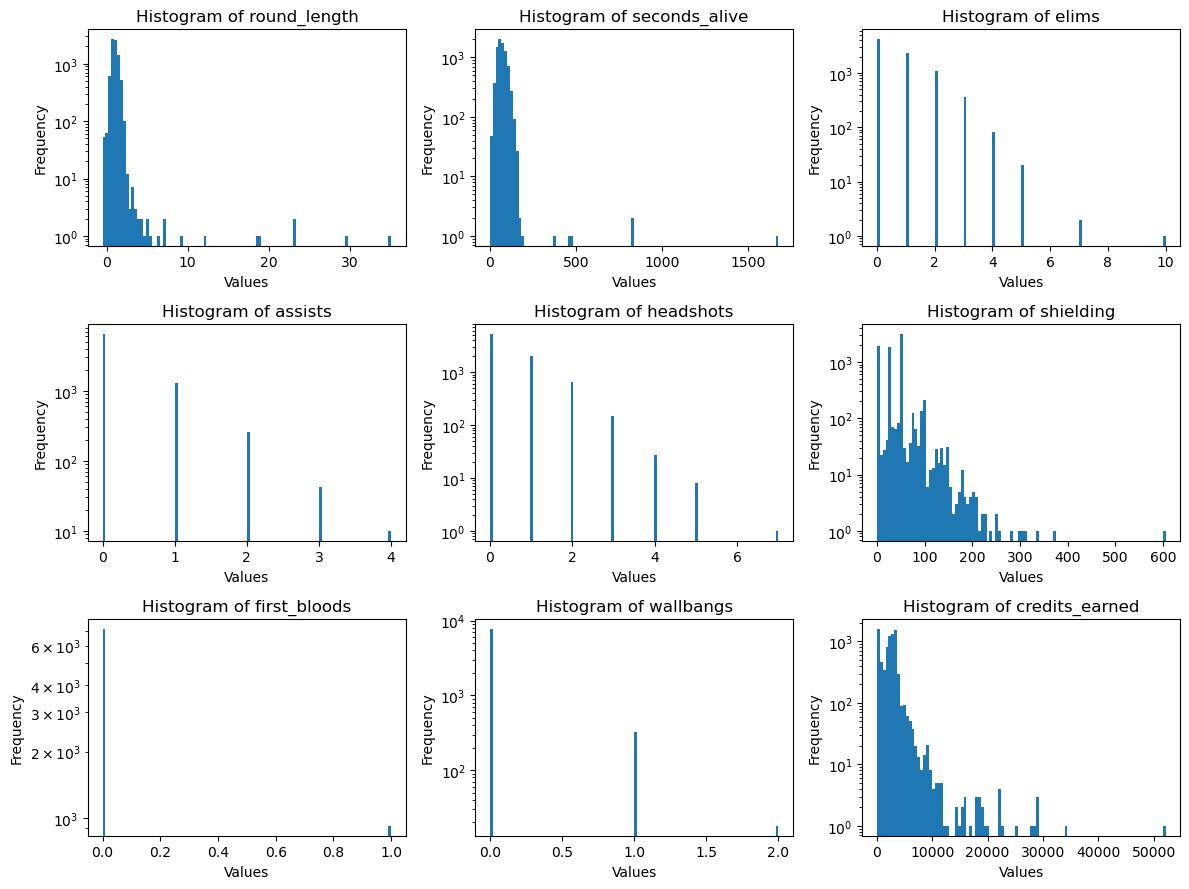

In [36]:
import matplotlib.pyplot as plt

columns = ['round_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(round_totals_normalized_df[column], bins=100)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

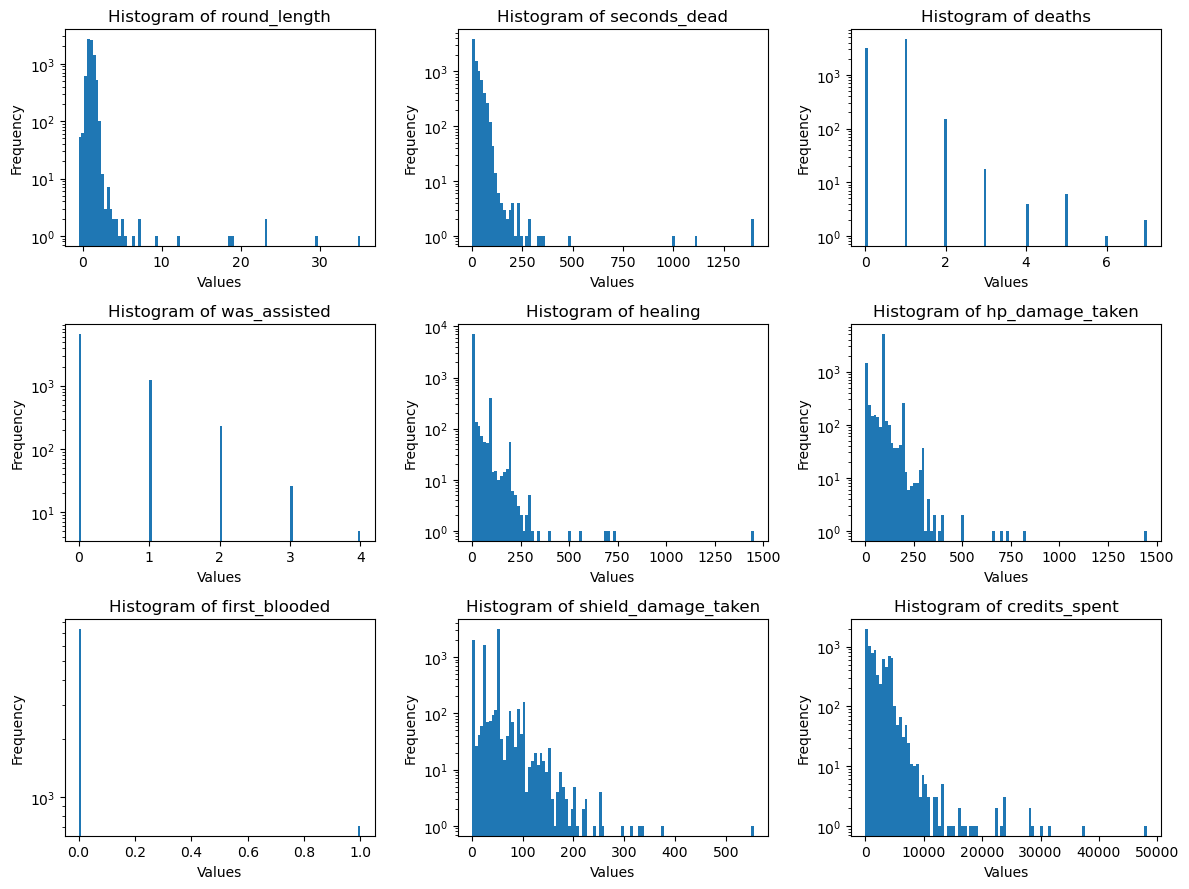

In [37]:
import matplotlib.pyplot as plt

columns = ['round_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(round_totals_normalized_df[column], bins=100)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [40]:
round_totals_normalized_df['round_won'] = round_totals_normalized_df['round_won'].astype(str)
round_totals_normalized_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,round_length
0,4-3,False,attacker,-25276,124802,True,4,4723,117802,False,...,0,71,0,4760,0,53,9860,100,24,2.001317
1,5-3,False,attacker,124802,204402,True,5,154802,197402,False,...,0,0,1,4750,0,79,3300,0,0,0.826667
2,6-3,False,attacker,204402,304570,True,6,234402,297570,True,...,1,0,0,200,0,100,3900,0,0,1.169467
3,7-3,False,attacker,304570,369242,True,7,334570,362242,False,...,1,0,2,350,0,64,1650,23,46,0.577867
4,8-3,False,attacker,369242,448998,True,8,399242,441998,False,...,0,0,0,8550,0,79,3300,23,0,0.829267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,unknown,attacker,1283681,1375064,True,8,1313681,1368064,unknown,...,0,11,0,1050,0,79,300,100,97,1.023050
8042,9-7,unknown,attacker,1375064,1439659,True,9,1405064,1432659,unknown,...,0,0,0,4700,0,64,3000,0,42,0.576583
8043,10-7,unknown,attacker,1439659,1504595,True,10,1469659,1497595,unknown,...,1,0,2,0,0,64,2900,21,85,0.582267
8044,11-7,unknown,attacker,1504595,1600300,True,11,1534595,1593300,unknown,...,0,15,0,5800,0,79,7700,100,50,1.095083


In [41]:
mapping = {'True': 1, 'False': 0, 'unknown': 3}
round_totals_normalized_df['round_won'] = round_totals_normalized_df['round_won'].map(mapping)
round_totals_normalized_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,round_length
0,4-3,False,attacker,-25276,124802,1,4,4723,117802,False,...,0,71,0,4760,0,53,9860,100,24,2.001317
1,5-3,False,attacker,124802,204402,1,5,154802,197402,False,...,0,0,1,4750,0,79,3300,0,0,0.826667
2,6-3,False,attacker,204402,304570,1,6,234402,297570,True,...,1,0,0,200,0,100,3900,0,0,1.169467
3,7-3,False,attacker,304570,369242,1,7,334570,362242,False,...,1,0,2,350,0,64,1650,23,46,0.577867
4,8-3,False,attacker,369242,448998,1,8,399242,441998,False,...,0,0,0,8550,0,79,3300,23,0,0.829267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,unknown,attacker,1283681,1375064,1,8,1313681,1368064,unknown,...,0,11,0,1050,0,79,300,100,97,1.023050
8042,9-7,unknown,attacker,1375064,1439659,1,9,1405064,1432659,unknown,...,0,0,0,4700,0,64,3000,0,42,0.576583
8043,10-7,unknown,attacker,1439659,1504595,1,10,1469659,1497595,unknown,...,1,0,2,0,0,64,2900,21,85,0.582267
8044,11-7,unknown,attacker,1504595,1600300,1,11,1534595,1593300,unknown,...,0,15,0,5800,0,79,7700,100,50,1.095083


In [44]:
round_totals_normalized_df = round_totals_normalized_df[round_totals_normalized_df['round_won'] != 3]
round_totals_normalized_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,round_length
0,4-3,False,attacker,-25276,124802,1,4,4723,117802,False,...,0,71,0,4760,0,53,9860,100,24,2.001317
1,5-3,False,attacker,124802,204402,1,5,154802,197402,False,...,0,0,1,4750,0,79,3300,0,0,0.826667
2,6-3,False,attacker,204402,304570,1,6,234402,297570,True,...,1,0,0,200,0,100,3900,0,0,1.169467
3,7-3,False,attacker,304570,369242,1,7,334570,362242,False,...,1,0,2,350,0,64,1650,23,46,0.577867
4,8-3,False,attacker,369242,448998,1,8,399242,441998,False,...,0,0,0,8550,0,79,3300,23,0,0.829267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8-7,unknown,attacker,1283681,1375064,1,8,1313681,1368064,unknown,...,0,11,0,1050,0,79,300,100,97,1.023050
8042,9-7,unknown,attacker,1375064,1439659,1,9,1405064,1432659,unknown,...,0,0,0,4700,0,64,3000,0,42,0.576583
8043,10-7,unknown,attacker,1439659,1504595,1,10,1469659,1497595,unknown,...,1,0,2,0,0,64,2900,21,85,0.582267
8044,11-7,unknown,attacker,1504595,1600300,1,11,1534595,1593300,unknown,...,0,15,0,5800,0,79,7700,100,50,1.095083


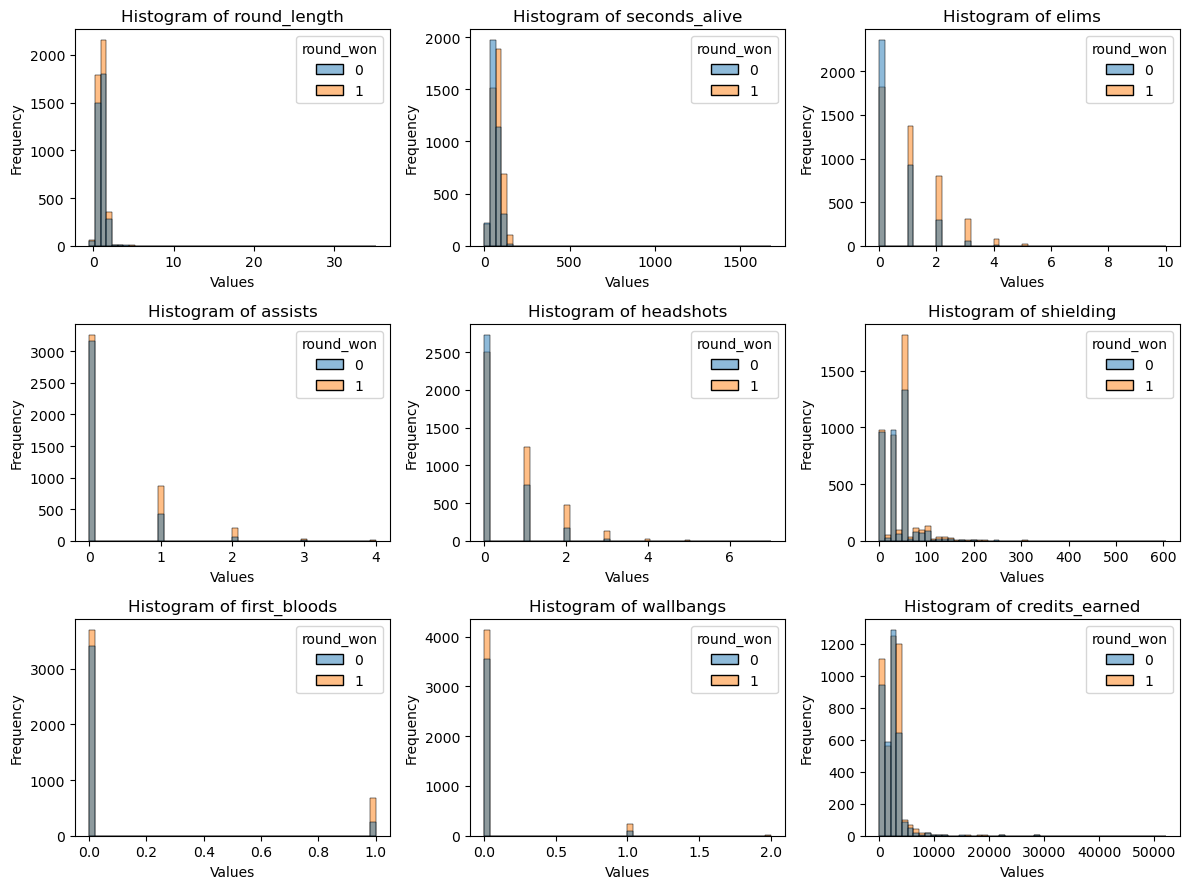

In [45]:
import seaborn as sns

# Specify the class label column
class_label = 'round_won'
columns = ['round_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=round_totals_normalized_df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

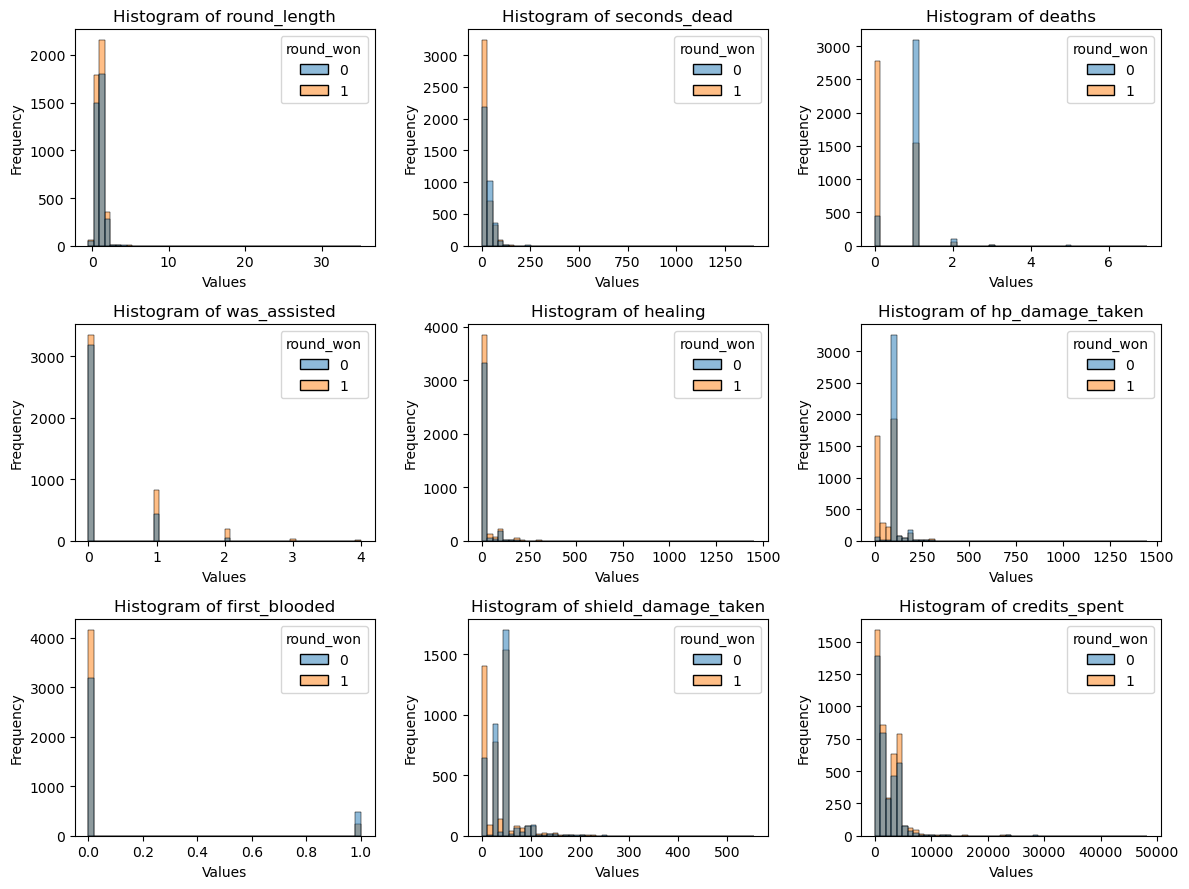

In [46]:
import seaborn as sns

# Specify the class label column
class_label = 'round_won'
columns = ['round_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Iterate over the columns and plot histograms in the grid
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=round_totals_normalized_df, x=column, hue=class_label, ax=ax, bins=50)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of histograms
plt.show()

In [50]:
p_df_1 = round_totals_normalized_df[['round_won','round_length','seconds_alive','elims','assists']]
p_df_2 = round_totals_normalized_df[['round_won','headshots','shielding','first_bloods','wallbangs','credits_earned']]

n_df_1 = round_totals_normalized_df[['round_won','round_length','seconds_dead','deaths','was_assisted']]
n_df_2 = round_totals_normalized_df[['round_won','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']]

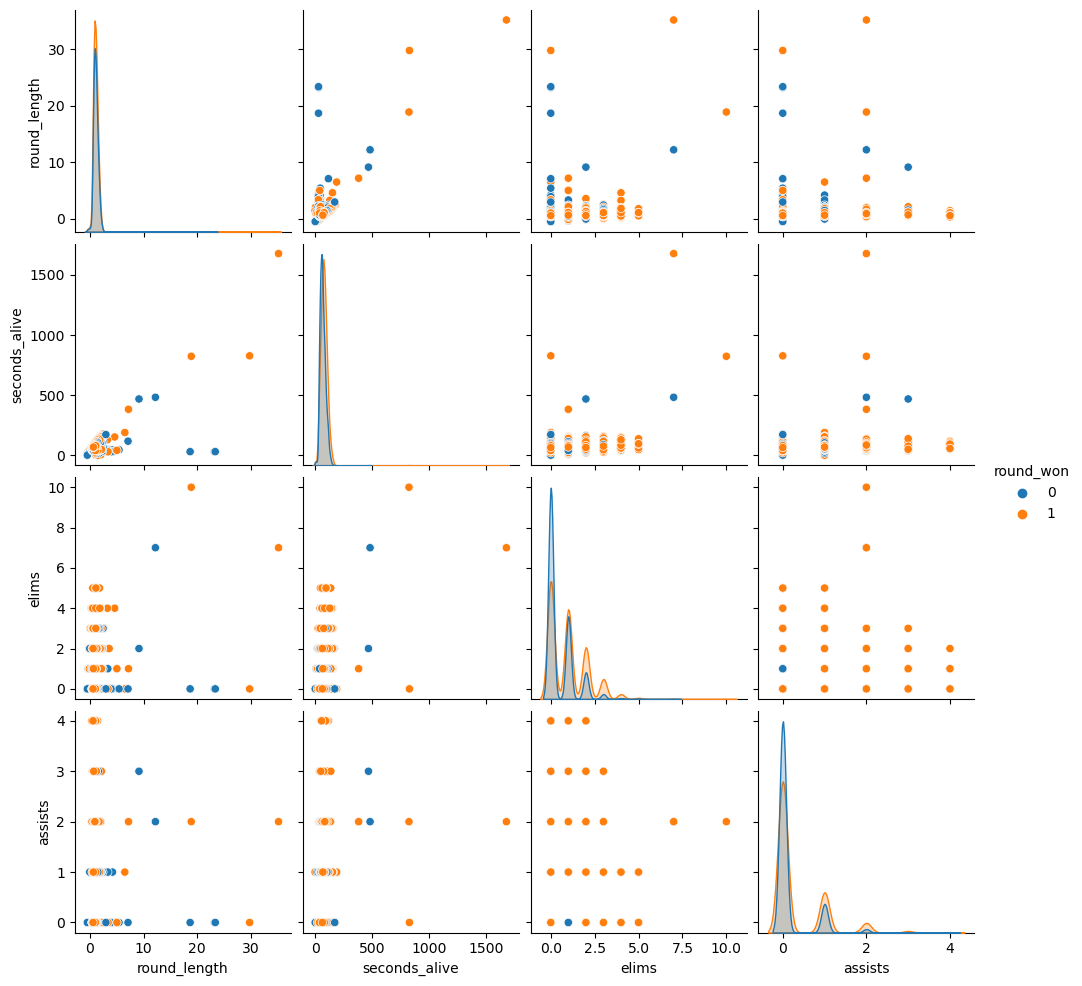

In [52]:
sns.pairplot(p_df_1,hue='round_won')

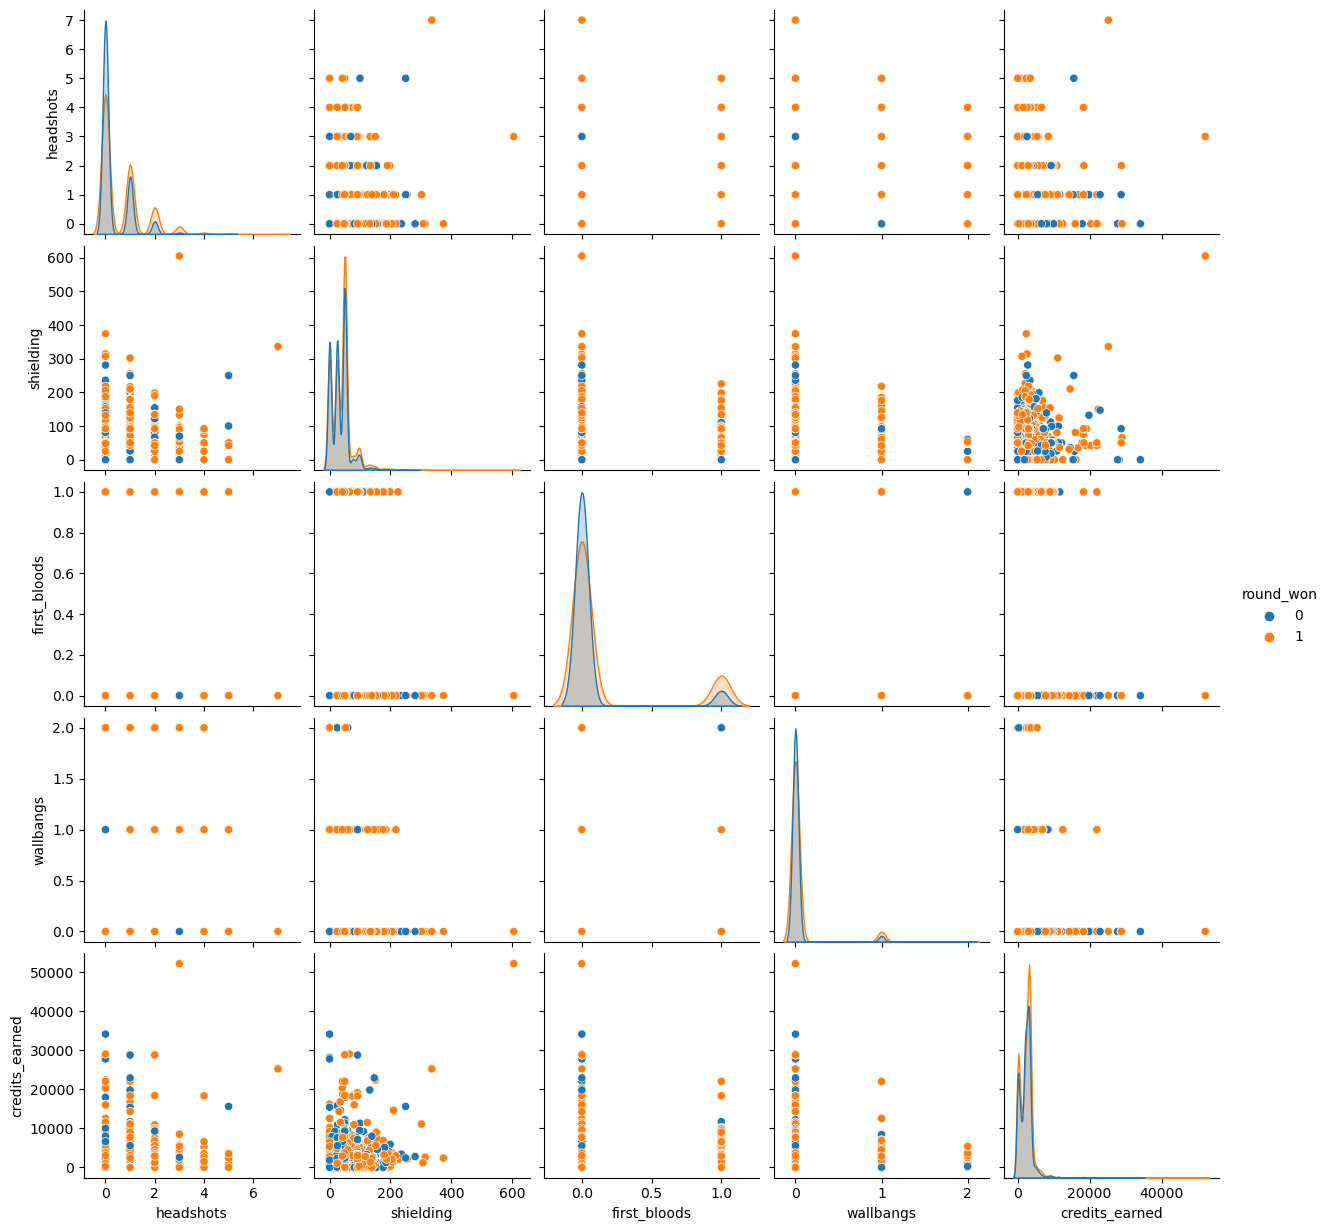

In [53]:
sns.pairplot(p_df_2,hue='round_won')

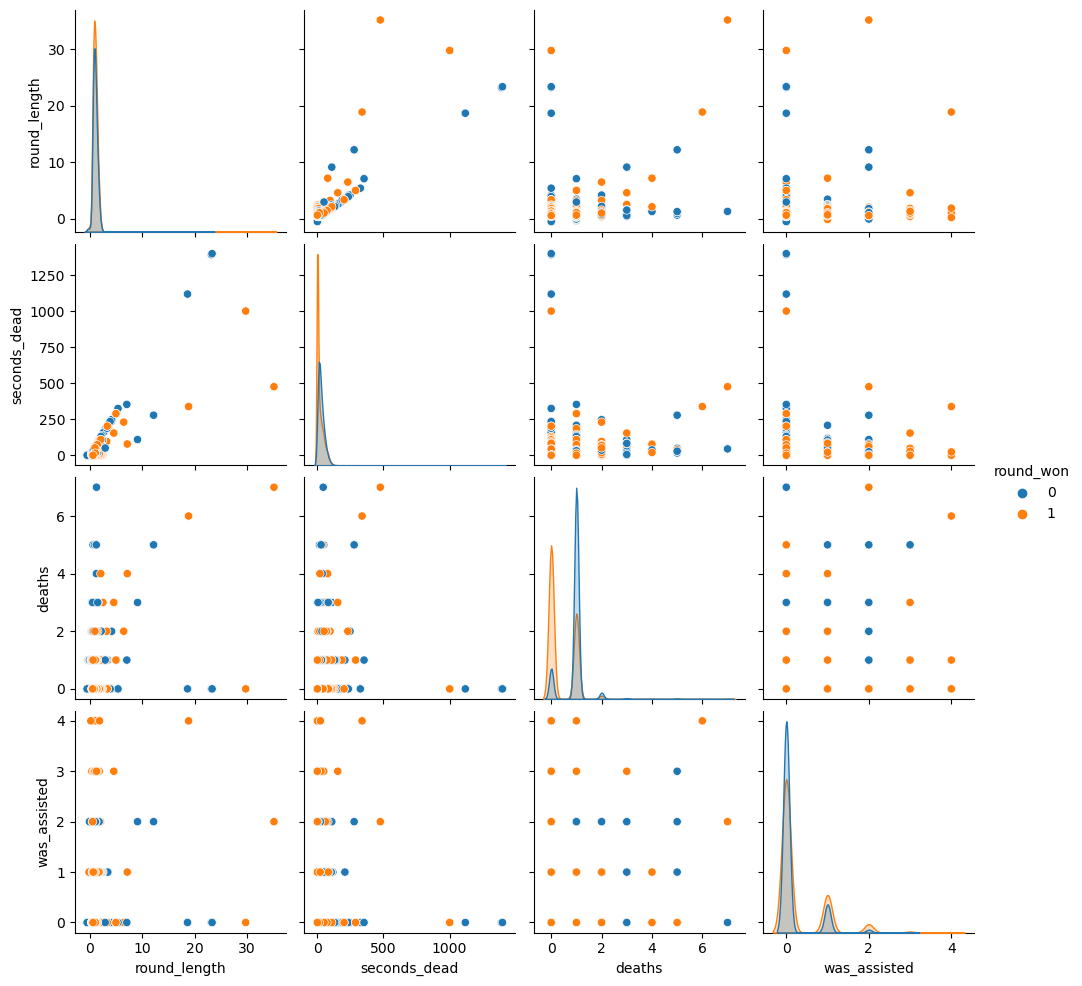

In [54]:
sns.pairplot(n_df_1,hue='round_won')

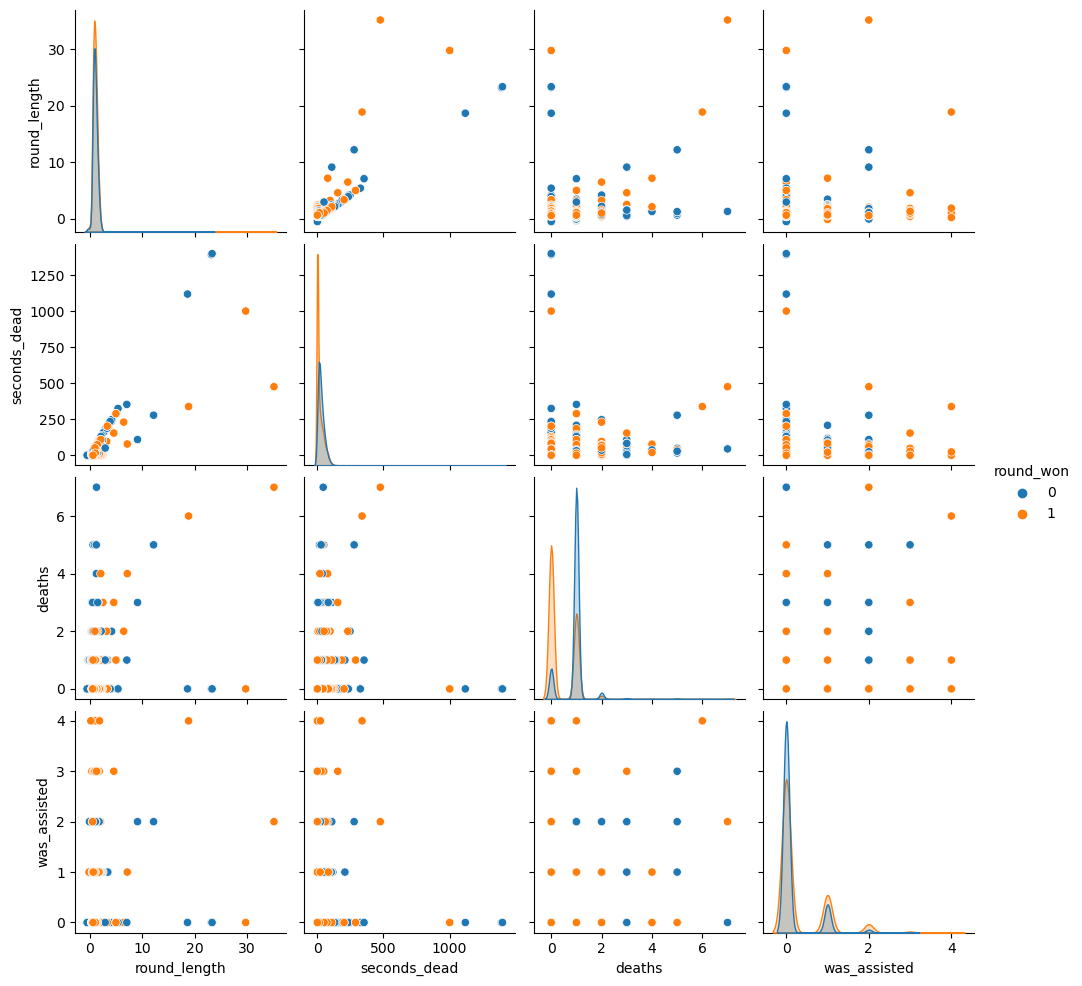

In [55]:
sns.pairplot(n_df_1,hue='round_won')

In [56]:
corr_df = round_totals_normalized_df[['round_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent','seconds_alive','elims','assists','headshots','shielding','first_bloods','credits_earned']]

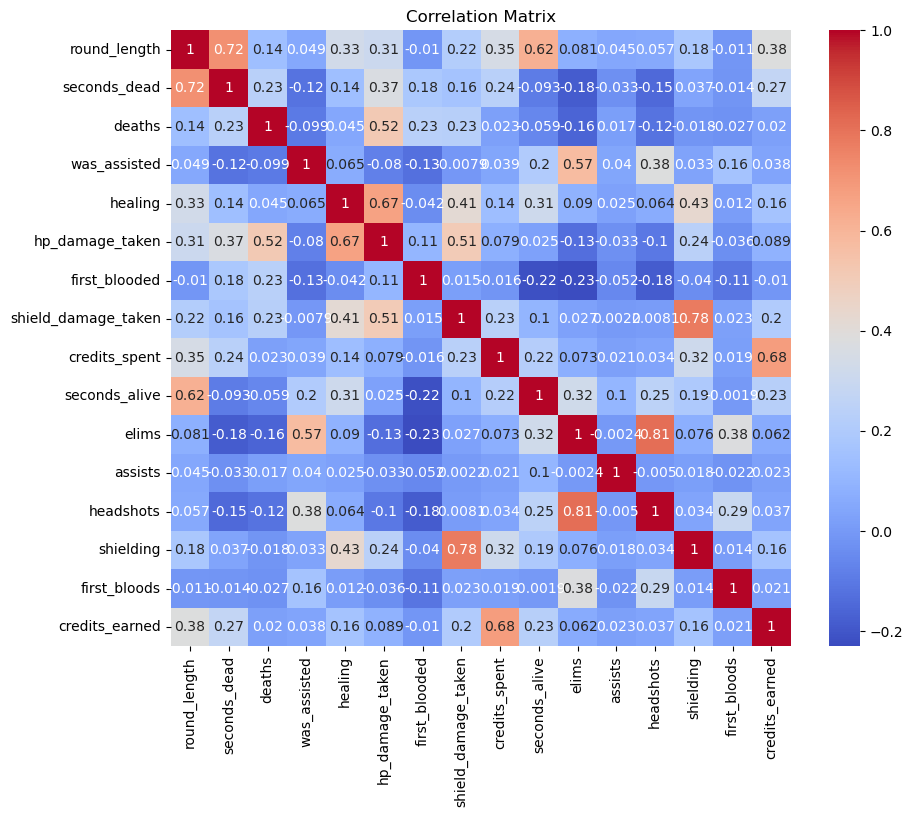

In [57]:
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [58]:
user_2_df = round_totals_normalized_df[(round_totals_normalized_df['user_id'] == 1012) | (round_totals_normalized_df['user_id'] == 1013)]
user_2_df = user_2_df.reset_index(drop=True)
user_2_df

,score,ult_used,ally_side,buy_start,round_end,round_won,ally_score,round_start,round_scored,spike_planted,...,first_bloods,seconds_dead,was_assisted,credits_spent,first_blooded,seconds_alive,credits_earned,hp_damage_taken,shield_damage_taken,round_length
0,11-10,False,unknown,199002,344000,1,11,229002,337000,True,...,0,114,0,3270,0,30,7470,100,8,1.916633
1,6-6,False,unknown,57201,310400,0,6,102201,303400,True,...,1,208,1,305,0,45,450,141,8,3.469983
2,6-7,False,unknown,310400,326800,1,6,340400,319800,False,...,0,0,0,0,0,16,0,0,0,-0.226667
3,7-7,False,unknown,326800,336200,1,7,356800,329200,False,...,0,0,0,0,0,9,0,0,0,-0.343333
4,2-5,False,unknown,67598,94600,1,2,97598,87600,False,...,0,0,0,1425,0,27,1775,0,0,-0.049967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,1-3,False,defender,419201,508799,0,1,449201,501799,False,...,0,56,0,3900,0,33,3400,200,100,0.993300
2377,1-4,False,defender,508799,586988,0,1,538799,579988,False,...,0,39,0,3300,0,39,2100,200,25,0.803150
2378,1-5,False,defender,586988,648401,0,1,616988,641401,False,...,0,31,0,1400,0,30,2400,100,25,0.523550
2379,1-6,False,defender,648401,762001,1,1,678401,755001,True,...,0,62,0,3550,0,51,2900,100,25,1.393333


In [59]:
class_counts = user_2_df.groupby('user_id')['round_won'].value_counts()
class_counts

user_id  round_won
1012     1            599
         0            511
1013     1            692
         0            579
Name: round_won, dtype: int64

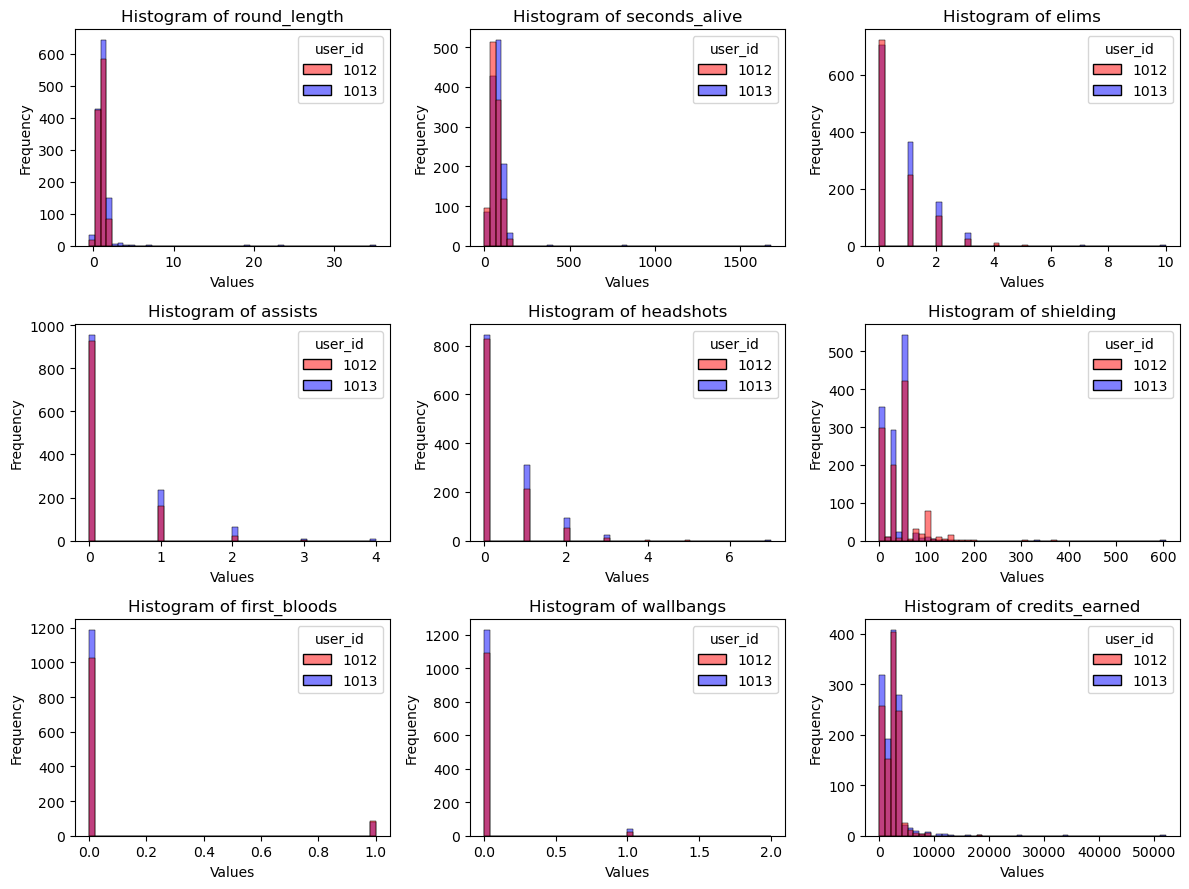

In [60]:
custom_palette = ['red', 'blue']
# pick the class label column
class_label = 'user_id'
columns = ['round_length','seconds_alive','elims','assists','headshots','shielding','first_bloods','wallbangs','credits_earned']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=user_2_df, x=column, hue=class_label, ax=ax, bins=50, palette=custom_palette)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

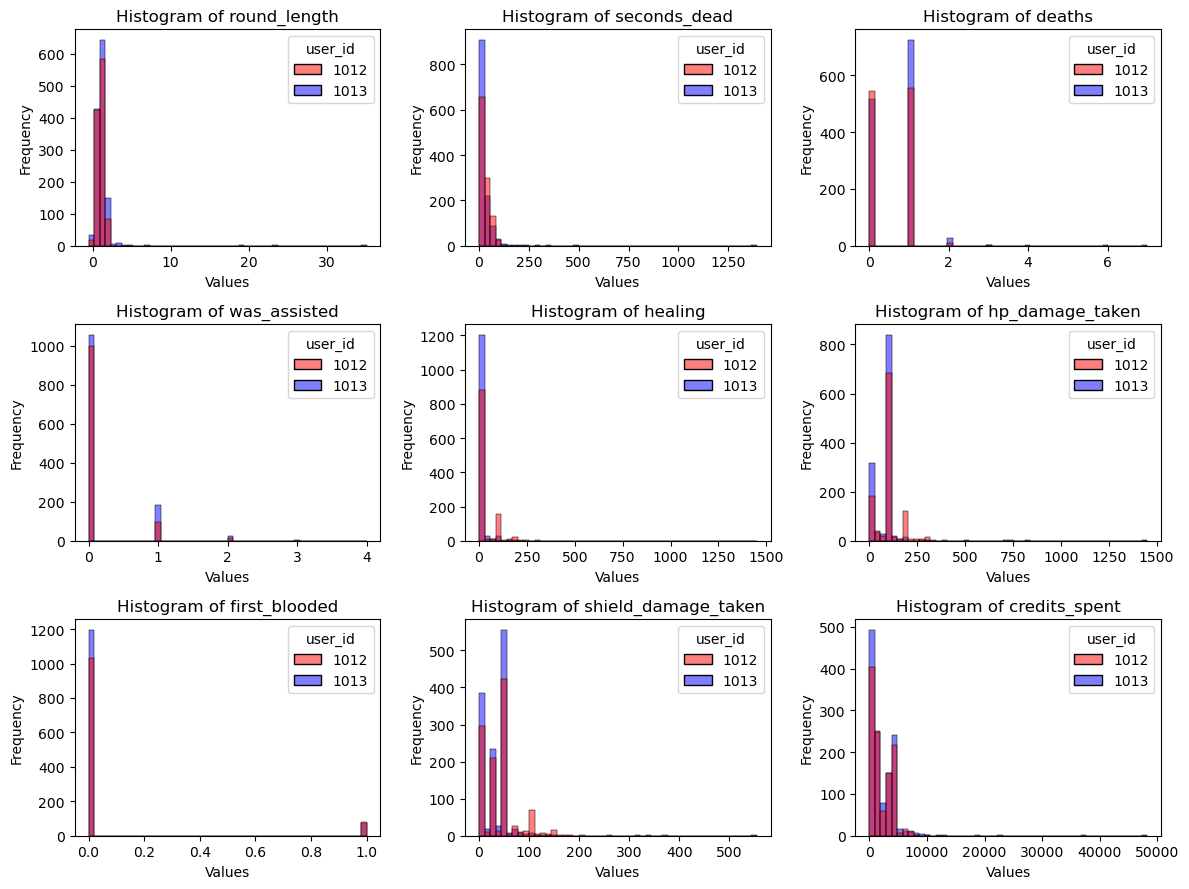

In [61]:
custom_palette = ['red', 'blue']
# pick the class label column
class_label = 'user_id'
columns = ['round_length','seconds_dead','deaths','was_assisted', 'healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=user_2_df, x=column, hue=class_label, ax=ax, bins=50, palette=custom_palette)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

In [63]:
p_user_2_df_1 = user_2_df[['user_id','round_length','seconds_alive','elims','assists']]
p_user_2_df_2 = user_2_df[['user_id','headshots','shielding','first_bloods','wallbangs','credits_earned']]

n_user_2_df_1 = user_2_df[['user_id','round_length','seconds_dead','deaths','was_assisted']]
n_user_2_df_2 = user_2_df[['user_id','healing','hp_damage_taken','first_blooded','shield_damage_taken','credits_spent']]

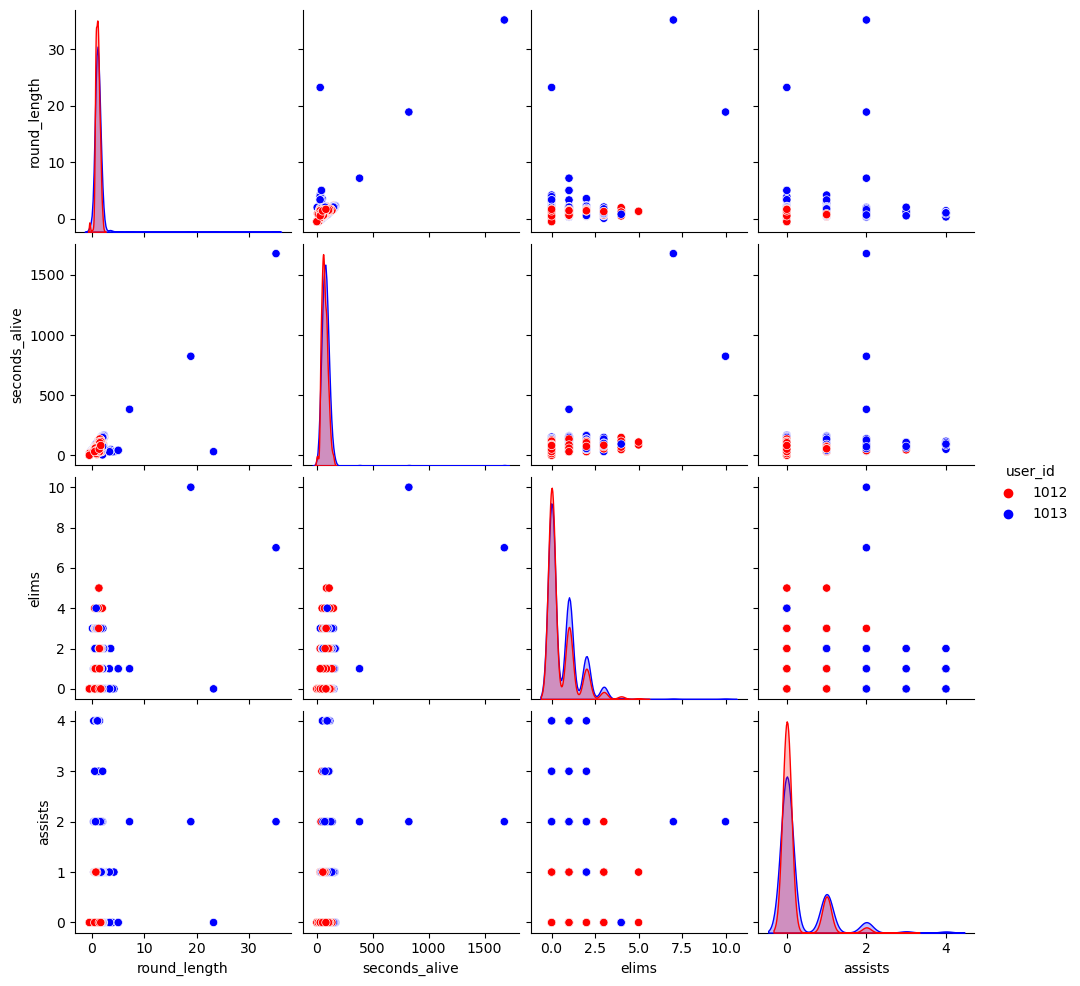

In [64]:
sns.pairplot(p_user_2_df_1,hue='user_id', palette=custom_palette)

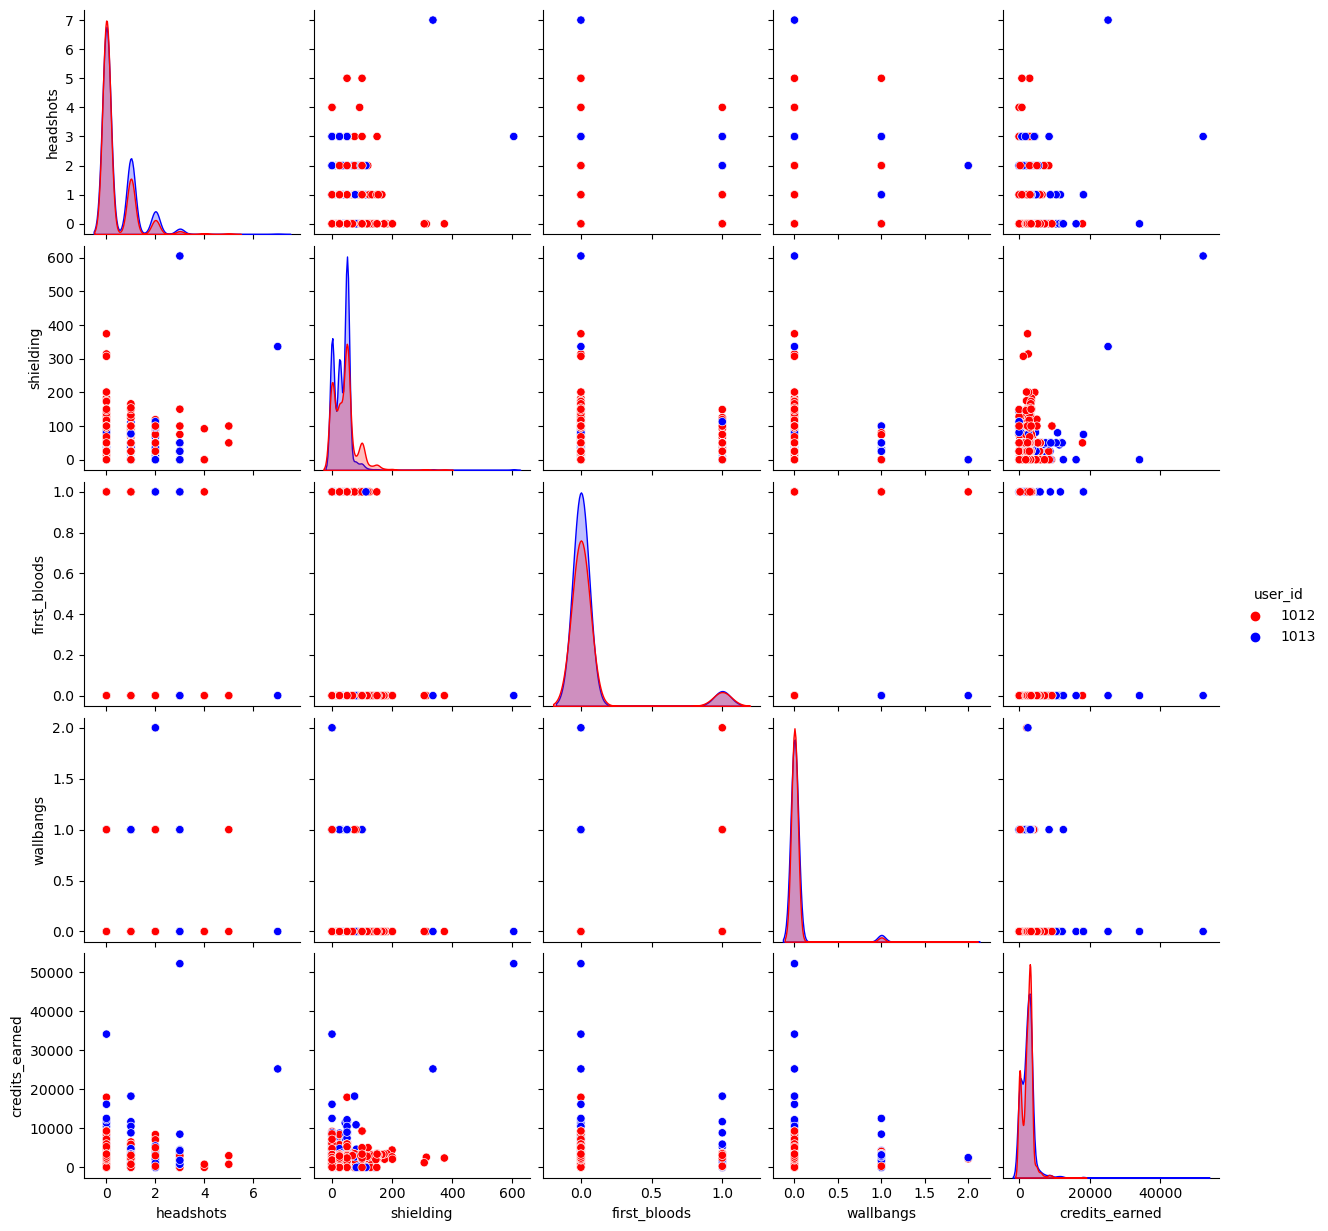

In [65]:
sns.pairplot(p_user_2_df_2,hue='user_id', palette=custom_palette)

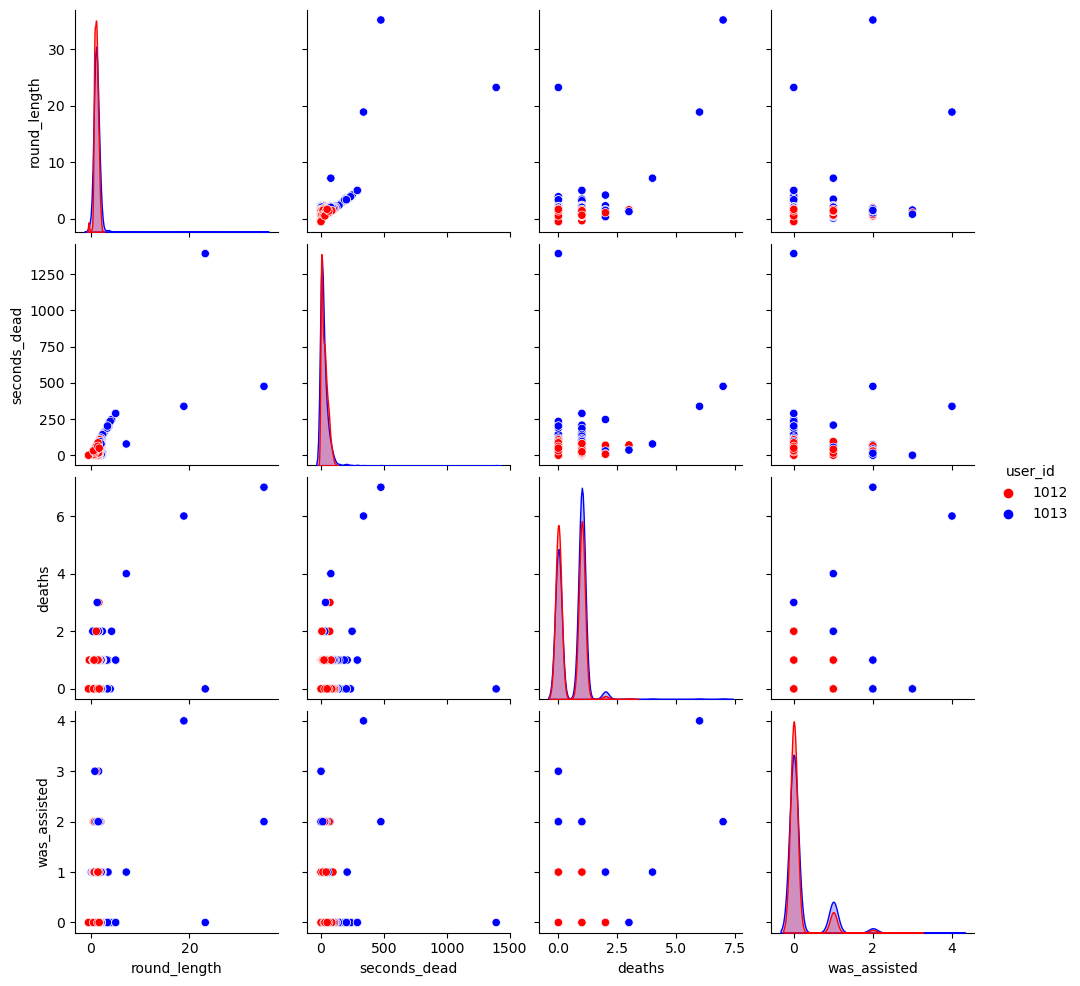

In [66]:
sns.pairplot(n_user_2_df_1,hue='user_id', palette=custom_palette)

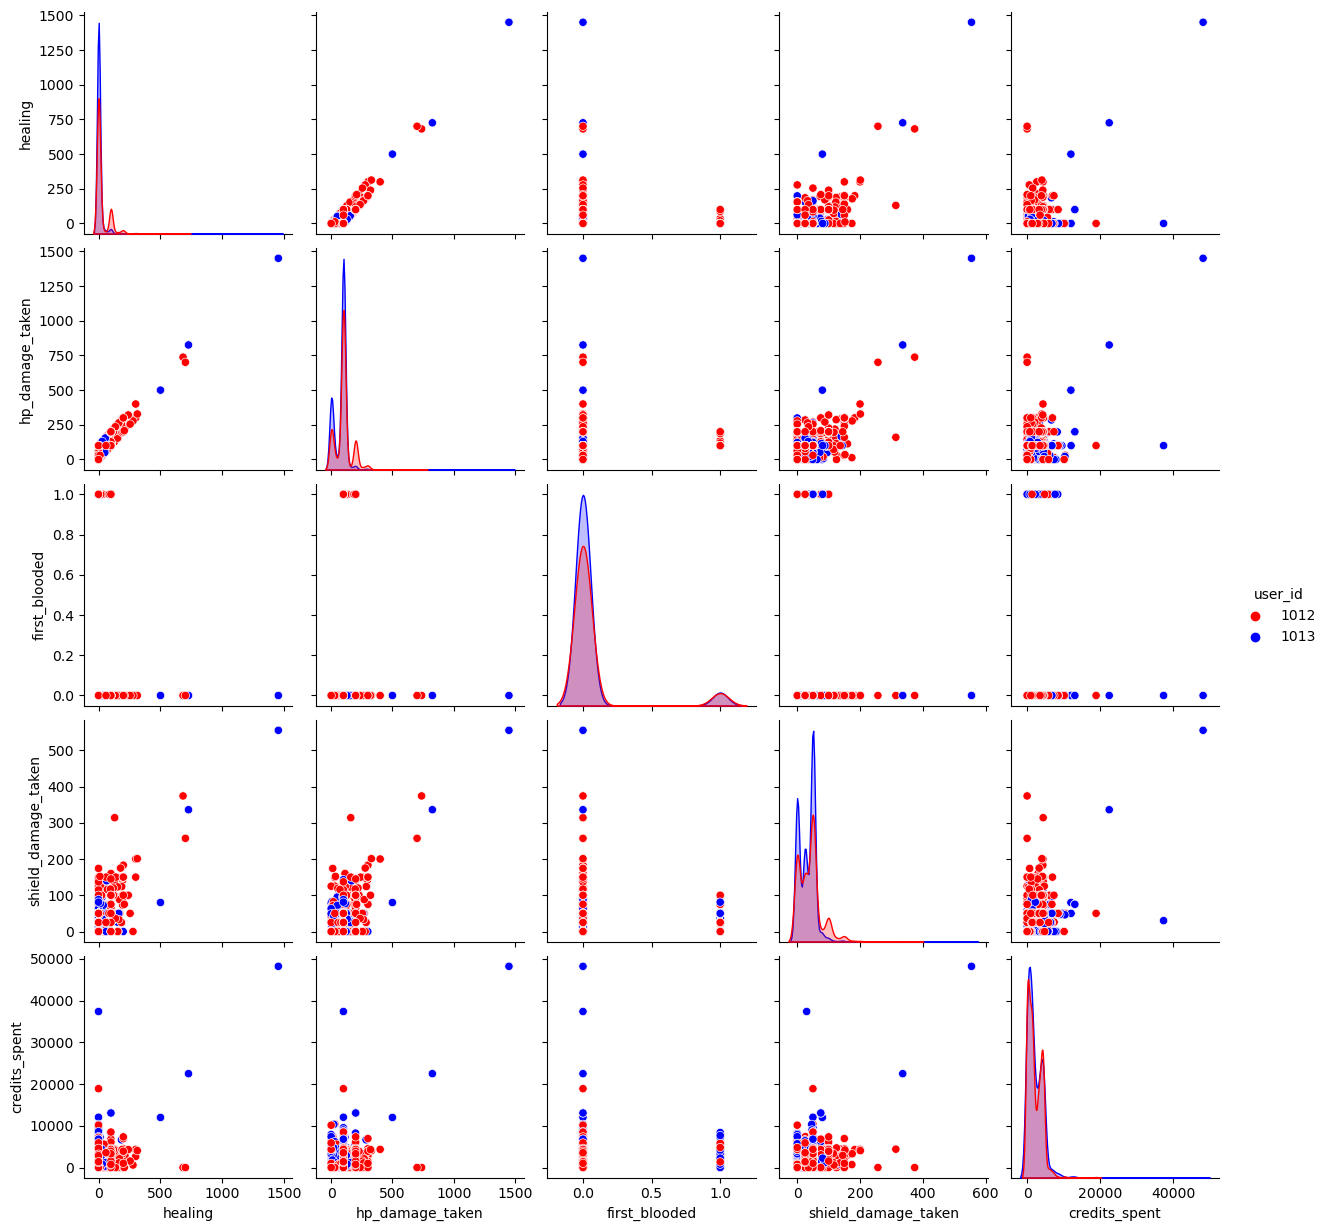

In [67]:
sns.pairplot(n_user_2_df_2,hue='user_id', palette=custom_palette)

## Thoughts
- The bi-modal distrobutions seem to have gone away, so the game-type seems to be the culprit there
- Not seeing a huge difference in feature seperability in terms of round won / round lost
- why are some round lengths negative??
- Unfortunatly we lost some seperability after normalizing by round, so gametype was probably also an issue

## Other steps/considerations
These are the current features in the DF:

'score'
'ally_score'
'opponent_score'

'ult_used'
'round_won'
'ally_side'
'spike_planted'


'ally_side'
'buy_start'
'round_end'
'round_won'
'round_length'
'round_start'
'round_scored'
'user_id'
'map'
'self_character'
 
'elims'
'assists'
'healing'
'headshots'
'shielding'
'wallbangs'
'first_bloods'
'seconds_alive'
'credits_earned'

'deaths'
'seconds_dead'
'was_assisted'
'credits_spent'
'first_blooded'
'hp_damage_taken'
'shield_damage_taken


1. There are more features we could get that are categorical (weapon, etc.)
2. There are more features we could get that are for the active character ("ability use", etc.)
3. There are possible features we could engineer (some kind of "movement" feature?)
4. We could dive into a more granular time resolution
5. We could capture SOME information about the teammates and opponents

## Timeseries data approaches

### Aggregation
Sort of most obvious approach... computing aggregate statistics like average health, total damage dealt, and number of eliminations in that time period. Already doing this to some extent, probably makes the most sense to start with round and then get more granular (or maybe start, middle, end per round). Loses information (like exact times things happened) but its somewhat unclear how much this will matter given the fact that I am not trying to predict the next event, I am trying to predict an overal characteristc (my sense is this is different than some other time-series problems like predicting weather or stock markets). 

### Feature Engineering
Create features that capture interesting events
- binary feature indicating whether a player's health has dropped below a certain threshold
- spike has been planted

Create lagged features
- change in health over the past few seconds

### Windowing
Define a "window" of a certain length (e.g., the past 5 seconds), and use the data in that window to predict the next event... I feel like this is not as relevent?

### Change Points Detection: 
Identify specific points where the properties of the series change. Could be a different way to segment the time series, like post spike plant or post player elimination. 